In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
     

In [41]:
# import csv file
df = pd.read_csv(r"C:\Users\ashut\Downloads\AirplaneCrash\Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [42]:
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


# Data cleaning

In [45]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [46]:
df.isnull().sum()/len(df) *100

Date             0.000000
Time            42.122248
Location         0.379651
Operator         0.341686
Flight #        79.707669
Route           32.403189
Type             0.512528
Registration     6.359150
cn/In           23.310554
Aboard           0.417616
Fatalities       0.227790
Ground           0.417616
Summary          7.403189
dtype: float64

In [47]:
df=df.drop('Flight #',axis='columns')
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Route         3561 non-null   object 
 5   Type          5241 non-null   object 
 6   Registration  4933 non-null   object 
 7   cn/In         4040 non-null   object 
 8   Aboard        5246 non-null   float64
 9   Fatalities    5256 non-null   float64
 10  Ground        5246 non-null   float64
 11  Summary       4878 non-null   object 
dtypes: float64(3), object(9)
memory usage: 494.0+ KB


In [49]:
df.shape

(5268, 12)

In [50]:
df.duplicated().sum()

0

In [51]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [52]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Registration',
       'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [53]:
df['Survived']=df['Aboard']-df['Fatalities']

In [54]:
df.Ground.value_counts()
     

Ground
0.0       5027
1.0         53
2.0         27
3.0         21
4.0         15
5.0         10
8.0         10
7.0          8
11.0         6
6.0          6
22.0         5
13.0         4
24.0         3
10.0         3
44.0         3
20.0         3
14.0         2
2750.0       2
30.0         2
12.0         2
19.0         2
47.0         2
52.0         2
70.0         2
54.0         1
18.0         1
45.0         1
16.0         1
35.0         1
50.0         1
23.0         1
225.0        1
125.0        1
75.0         1
15.0         1
32.0         1
49.0         1
9.0          1
40.0         1
36.0         1
113.0        1
107.0        1
33.0         1
87.0         1
31.0         1
63.0         1
17.0         1
37.0         1
58.0         1
85.0         1
Name: count, dtype: int64

In [55]:
df[df.Ground == 2750.0]

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survived
4803,09/11/2001,08:47,"New York City, New York",American Airlines,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...,0.0
4804,09/11/2001,09:03,"New York City, New York",United Air Lines,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65.0,65.0,2750.0,The aircraft was hijacked shortly after it lef...,0.0


In [56]:
df.Time.value_counts()
     

Time
15:00    32
12:00    31
11:00    29
19:30    26
16:00    26
         ..
19:37     1
19:18     1
07:54     1
13:49     1
15:32     1
Name: count, Length: 1005, dtype: int64

In [58]:
df['Time'] = df['Time'].str.replace('c: ', '')
df['Time'] = df['Time'].str.replace('c:', '')
df['Time'] = df['Time'].str.replace('c', '')
df['Time'] = df['Time'].str.replace('12\'20', '12:20')
df['Time'] = df['Time'].str.replace('18.40', '18:40')
df['Time'] = df['Time'].str.replace('0943', '09:43')
df['Time'] = df['Time'].str.replace('22\'08', '22:08')
df['Time'] = df['Time'].str.replace('114:20', '00:00')
     

In [59]:
df['Time'] = df['Time'].fillna('00:00')
     

In [60]:
df['DateTime'] = df['Date'] + ' ' + df['Time']
     

In [61]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survived,DateTime
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0,09/17/1908 17:18
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,07/12/1912 06:30
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,08/06/1913 00:00
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0,09/09/1913 18:30
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0,10/17/1913 10:30


In [62]:
df.DateTime=pd.to_datetime(df.DateTime)

# Visulization

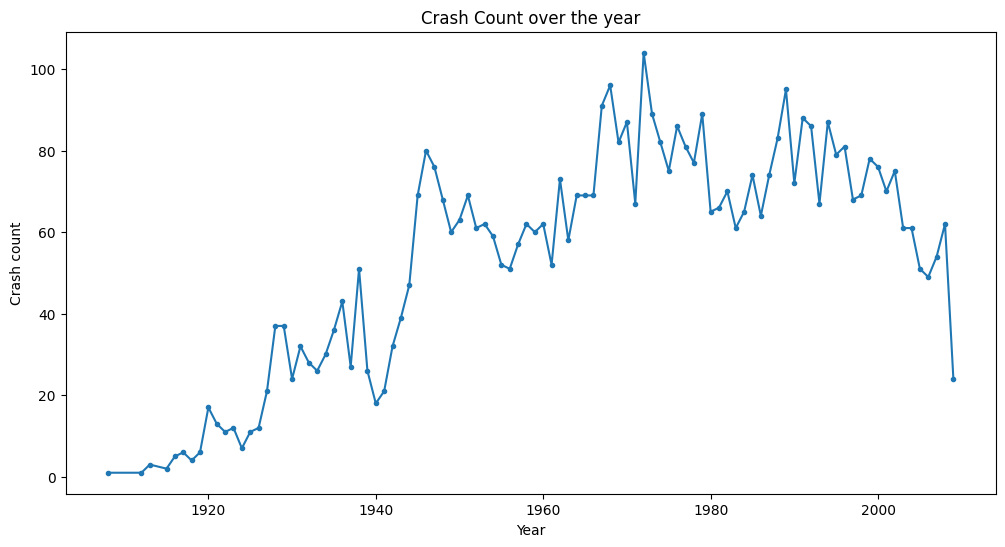

In [99]:
year=df.groupby(df.DateTime.dt.year)[['Time']].count()
plt.figure(figsize=(12,6))
plt.plot(year.index,year.Time,marker='.')
plt.xlabel('Year')
plt.ylabel('Crash count')
plt.title("Crash Count over the year")
plt.show()

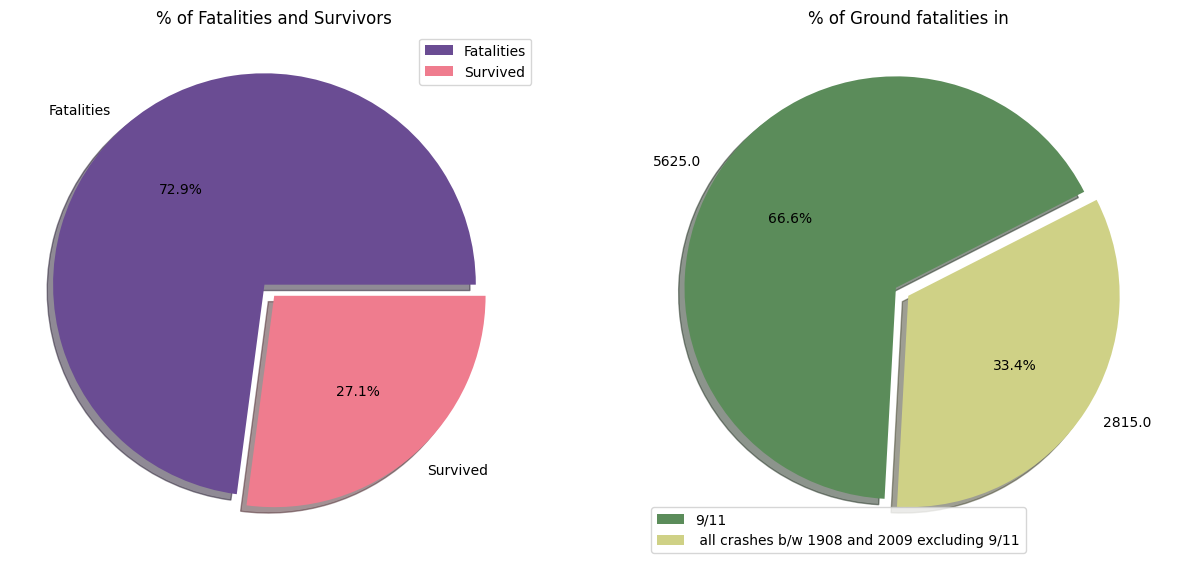

In [101]:
Fatalities=df.Fatalities.sum()
Survived=df.Survived.sum()
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
pieplot=[Fatalities,Survived]
labels=['Fatalities','Survived']
plt.pie(pieplot,labels=labels,autopct="%1.1f%%",explode=(0.07,0),shadow=True,colors=['#6a4c93', '#ef7c8e'])
plt.title("% of Fatalities and Survivors")
plt.legend(["Fatalities","Survived"])

plt.subplot(1,2,2)
df_911=df[(df.DateTime.dt.day == 11) & (df.DateTime.dt.month ==9) & (df.DateTime.dt.year==2001)]
df_remain=df[~((df.DateTime.dt.day == 11) & (df.DateTime.dt.month ==9) & (df.DateTime.dt.year==2001))]
plt.title("% of Ground fatalities in")
label=[df_911.Ground.sum(),df_remain.Ground.sum()]
plt.pie([df_911.Ground.sum(),df_remain.Ground.sum()],labels=label,autopct="%1.1f%%",shadow=True,startangle=27,explode=(0.07,0),colors=["#5b8c5a","#cfd186"])
plt.legend(["9/11"," all crashes b/w 1908 and 2009 excluding 9/11"])
     

In [78]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [93]:
# Selecting only numeric columns for sum operation
numeric_columns = ['Aboard', 'Fatalities']
sum = df.groupby(df['DateTime'].dt.year)[numeric_columns].sum()

# Calculating the proportion
sum["Proportion"] = sum["Fatalities"] / sum["Aboard"]

# Rest of the visualization code remains the same
plt.figure(figsize=(15, 5))
...


Ellipsis

<Figure size 1500x500 with 0 Axes>

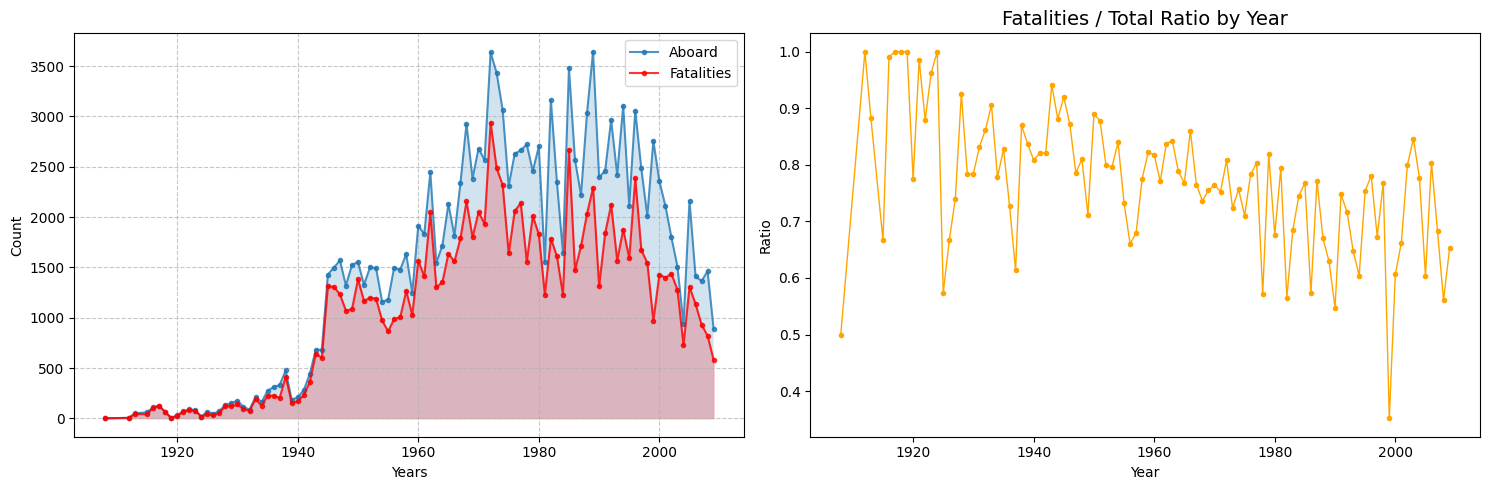

In [95]:
# Selecting only numeric columns for sum operation
numeric_columns = ['Aboard', 'Fatalities']
sum = df.groupby(df['DateTime'].dt.year)[numeric_columns].sum()

# Calculating the proportion
sum["Proportion"] = sum["Fatalities"] / sum["Aboard"]

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.xlabel("Years")
plt.ylabel("Count")
plt.plot(sum.index, sum["Aboard"], marker=".", alpha=0.8)
plt.plot(sum.index, sum["Fatalities"], marker=".", color="red", alpha=0.8)
plt.fill_between(sum.index, sum["Aboard"], alpha=0.2)
plt.fill_between(sum.index, sum["Fatalities"], color="red", alpha=0.2)
plt.legend(["Aboard", "Fatalities"])
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(sum.index, sum["Proportion"], marker=".", linewidth=1, color="orange")
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()

plt.show()


In [81]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5268 non-null   object        
 1   Time          5268 non-null   object        
 2   Location      5248 non-null   object        
 3   Operator      5250 non-null   object        
 4   Route         3561 non-null   object        
 5   Type          5241 non-null   object        
 6   Registration  4933 non-null   object        
 7   cn/In         4040 non-null   object        
 8   Aboard        5246 non-null   float64       
 9   Fatalities    5256 non-null   float64       
 10  Ground        5246 non-null   float64       
 11  Summary       4878 non-null   object        
 12  Survived      5246 non-null   float64       
 13  DateTime      5268 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 576.3+ KB


C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


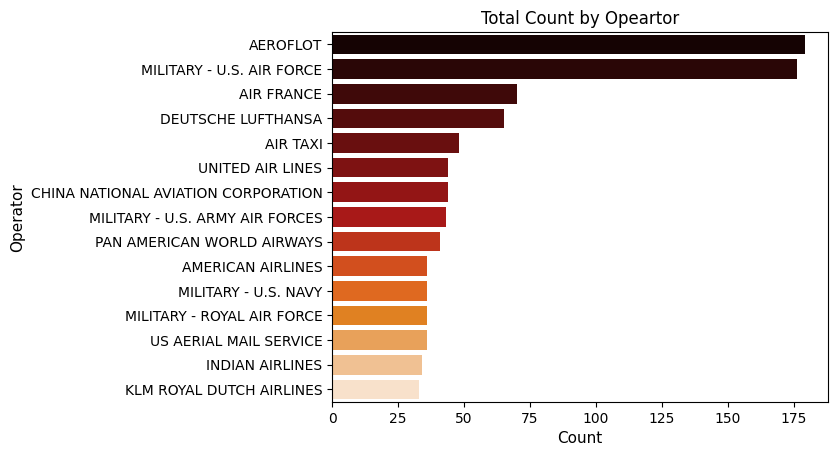

In [82]:
df.Operator=df.Operator.str.upper()
df.Operator=df.Operator.replace("A B AEROTRANSPORT","AB AEROTRANSPORT")
operate=df.groupby(df.Operator)[["Operator"]].count()
operate=operate.rename(columns={"Operator":"count"})

operate=operate.sort_values(by="count",ascending=False).head(15)

sn.barplot(y=operate.index ,x="count",data=operate,orient='h',palette="gist_heat")
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Count by Opeartor', loc='Center',fontsize=12)
plt.show()

C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Total Fatalities by Opeartor')

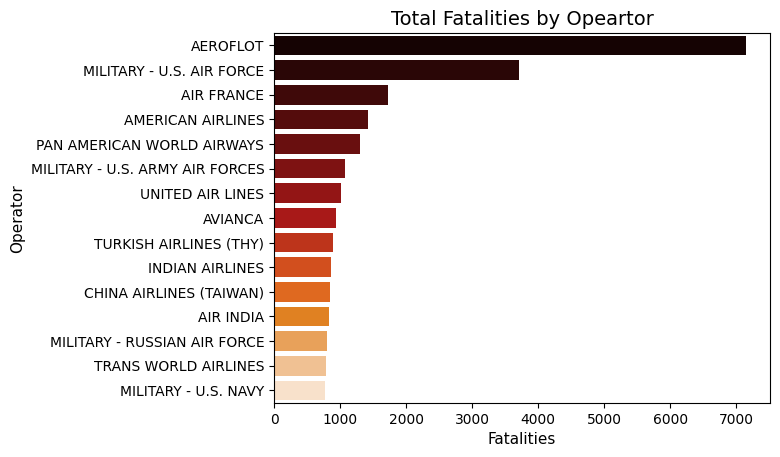

In [83]:
fatal_byop=df.groupby(df.Operator)[["Fatalities"]].sum()
fatal_byop=fatal_byop.sort_values(by="Fatalities",ascending=False).head(15)

sn.barplot(y=fatal_byop.index,x=fatal_byop.Fatalities,palette="gist_heat",orient="h")
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Opeartor', loc='Center', fontsize=14)
     

C:\Users\ashut\AppData\Local\Temp\ipykernel_21640\1928585603.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label=[type1["Military"].value_counts()[0],type1["Military"].value_counts()[1]]
C:\Users\ashut\AppData\Local\Temp\ipykernel_21640\1928585603.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label=[type1["Military"].value_counts()[0],type1["Military"].value_counts()[1]]
C:\Users\ashut\AppData\Local\Temp\ipykernel_21640\1928585603.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

Text(0.5, 1.0, 'Total number of fight crashes by their type')

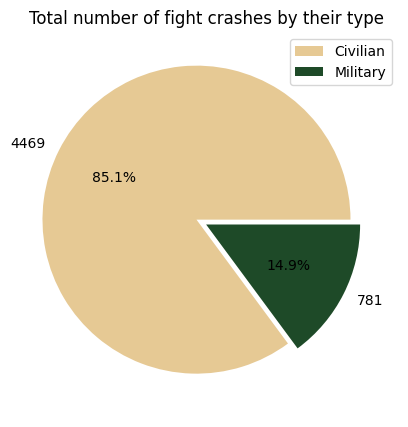

In [85]:
type1=df.copy()
type1["Military"]=type1.Operator.str.contains("MILITARY")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
color=["#e6c994","#1e4a28"]
label=[type1["Military"].value_counts()[0],type1["Military"].value_counts()[1]]
plt.pie([type1["Military"].value_counts()[0],type1["Military"].value_counts()[1]],autopct="%1.1f%%",colors=color,explode=(0.07,0),labels=label)
plt.legend(["Civilian","Military"])
plt.title("Total number of fight crashes by their type")

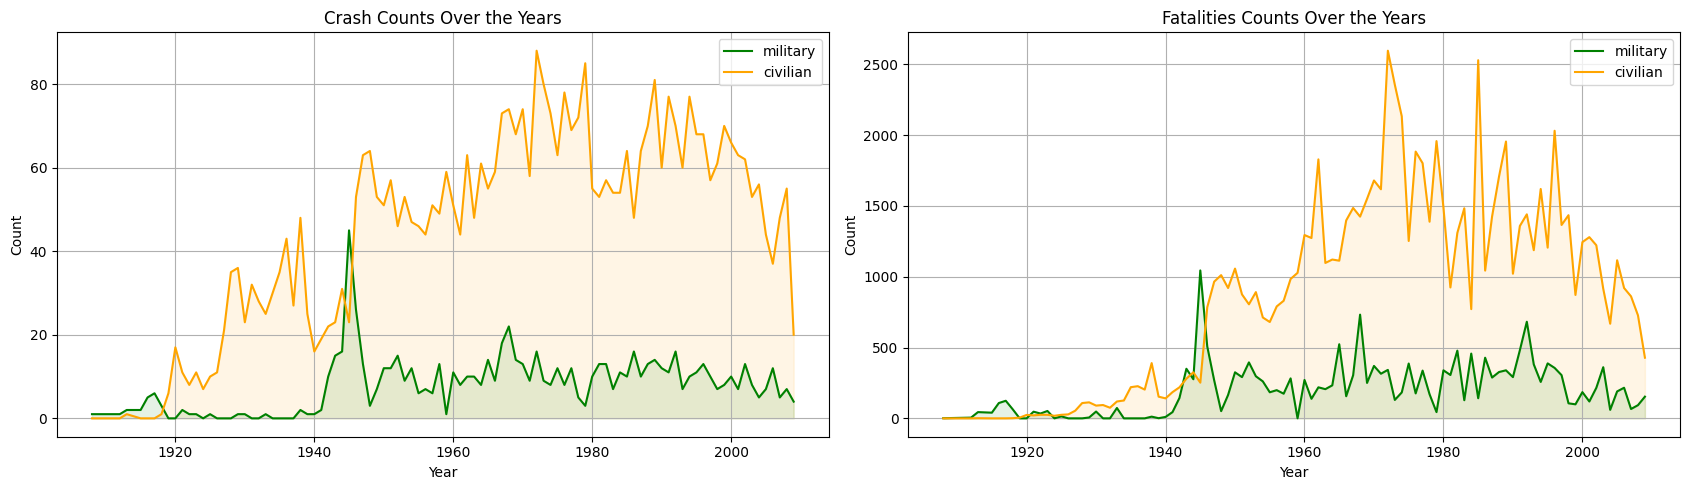

In [87]:
civilian = type1[type1["Military"] == False]
military = type1[type1["Military"] == True]

civilian_count = civilian.groupby(civilian["DateTime"].dt.year)[["Time"]].count()
military_count = military.groupby(military["DateTime"].dt.year)[["Time"]].count()

civilian_count.rename(columns={"Time": "civil"}, inplace=True)
military_count.rename(columns={"Time": "mili"}, inplace=True)

merged_data = pd.merge(military_count, civilian_count, how="outer", left_index=True, right_index=True)
merged_data.fillna(0, inplace=True)

plt.figure(figsize=(17, 5))

plt.subplot(1, 2, 1)
plt.plot(merged_data.index, merged_data["mili"], color="green", label="military")
plt.plot(merged_data.index, merged_data["civil"], color="orange", label="civilian")
plt.fill_between(merged_data.index, merged_data["civil"], color="orange", alpha=0.1)
plt.fill_between(merged_data.index, merged_data["mili"], color="green", alpha=0.1)
plt.title('Crash Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

civilian_sum = civilian.groupby(civilian["DateTime"].dt.year)[["Fatalities"]].sum()
military_sum = military.groupby(military["DateTime"].dt.year)[["Fatalities"]].sum()

civilian_sum.rename(columns={"Fatalities": "civil fatalities"}, inplace=True)
military_sum.rename(columns={"Fatalities": "military fatalities"}, inplace=True)

merged_data2 = pd.merge(military_sum, civilian_sum, how="outer", left_index=True, right_index=True)
merged_data2.fillna(0, inplace=True)

plt.subplot(1, 2, 2)
plt.plot(merged_data2.index, merged_data2["military fatalities"], color="green", label="military")
plt.plot(merged_data2.index, merged_data2["civil fatalities"], color="orange", label="civilian")
plt.fill_between(merged_data2.index, merged_data2["civil fatalities"], color="orange", alpha=0.1)
plt.fill_between(merged_data2.index, merged_data2["military fatalities"], color="green", alpha=0.1)
plt.title('Fatalities Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
